# Monte Carlos Simulation

## 1-D Monte Carlos for f(x)'s integral from 0 to 1

In [1]:
'''
Step 1: Generate many x from Uniform(0,1)

Step 2: Calculate g(x) for each x

Step 3: Calculate the sample mean of all the g(x) generated in Step 2
'''

'\nStep 1: Generate many xx from Uniform(0,1)Uniform(0,1)\n\nStep 2: Calculate g(x)g(x) for each xx\n\nStep 3: Calculate the sample mean of all the g(x)g(x) generated in Step 2\n'

In [6]:
# integral [0,1] e^(-x^2)
import numpy as np
x = np.random.rand(10000)
gx = np.exp(-x**2)
gx.mean()

0.7444510597636933

## 1-D Monte Carlos for f(x)'s integral from a to b

In [ ]:
'''
What is important is to make sure h(0) = a h(1) = b

For finite a and b, a good choice would be h(x) = a + (b-a)*x

f(y) integral from a to b f(h(x))*h'(x) integral from 0 to 1

Step 1: Generate many x from Uniform(0,1)

Step 2: Calculate g(x) for each x. Now g(x)=f(a+(b−a)x)(b−a)

Step 3: Calculate the sample mean of all the g(x)g(x) generated in Step 2

'''

In [8]:
x = np.random.rand(1000)
hx = x + 1
fy = np.exp(-hx)/-hx
gy = np.exp(-hx)/-hx * (1)
gy.mean()



-0.17021093385074695

## 1-D Monte Carlos for f(x)'s integral from -infinity to b

In [9]:
'''
h(0) = -infinity
h(1) = b

h(x) = -1/x + b + 1
h'(x) = 1/x**2

Step 1: Generate many x from Uniform(0,1)

Step 2: Calculate g(x) for each x. Now g(x) = f(1-1/x+b)/x^2
 
Step 3: Calculate the sample mean of all the g(x) generated in Step 2


'''

"\nh(0) = -infinity\nh(1) = b\n\nh(x) = -1/x + b + 1\nh'(x) = 1/x**2\n\nStep 1: Generate many x from Uniform(0,1)\n\nStep 2: Calculate g(x) for each x. Now g(x) = f(1-1/x+b)/x^2\n \nStep 3: Calculate the sample mean of all the g(x) generated in Step 2\n\n\n"

In [11]:
b = -2
x = np.random.rand(1000)
hx = -1/x + b + 1
fy = 1/np.sqrt(2*np.pi)*np.exp(-hx**2/2)
gy = fy * (1/x**2)
gy.mean()

0.022410214938974382

## 1-D Monte Carlos for f(x)'s integral from a to infinity

In [12]:
'''
h(0) = a
h(1) = infinity
h(x) = 1/(1-x) + a - 1
h'(x) = (1-x)**(-2)

Step 1: Generate many x from Uniform(0,1)

Step 2: Calculate g(x) for each x. Now g(x)=1/(1-x) + a + 1

Step 3: Calculate the sample mean of all the g(x)g(x) generated in Step 2


'''

"\nh(0) = a\nh(1) = infinity\nh(x) = 1/(1-x) + a - 1\nh'(x) = (1-x)**(-2)\n\nStep 1: Generate many x from Uniform(0,1)\n\nStep 2: Calculate g(x) for each x. Now g(x)=1/(1-x) + a + 1\n\nStep 3: Calculate the sample mean of all the g(x)g(x) generated in Step 2\n\n\n"

In [16]:
a = -2
x = np.random.rand(1000)
hx = 1/(1-x) + a - 1
fy = 1/np.sqrt(2*np.pi)*np.exp(-hx**2/2)
gx = fy * 1/(1-x)**2
gx.mean()

0.9699380426975901

# CI for Monte Carlos

In [17]:
'''
Step 1: after you done with monte carlos simulation, calculate S=np.std(gx,ddof=1)

Step 2: according to alpha (1-confidence level), z = spst.norm.ppf(1-alpha/2), t = spst.t.ppf(1-alpha/2,N - 1)

Step 3：
upperbound = result + S*t/N**0.5
lowerbound = result - S*t/N**0.5

Step 4(Optional): Draw the sample distribution using 
plt.hist(gx,density = True,bins = 30)

'''


'\nStep 1: after you done with monte carlos simulation, calculate S=np.std(gx,ddof=1)\n\nStep 2: according to alpha (1-confidence level), z = spst.norm.ppf(1-alpha/2), t = spst.t.ppf(1-alpha/2,N - 1)\n\nStep 3：\nupperbound = result + S*t/N**0.5\nlowerbound = result - S*t/N**0.5\n\nStep 4(Optional): Draw the sample distribution using \nplt.hist(gx,density = True,bins = 30)\n\n'

41.793183264083886 42.50899907990706


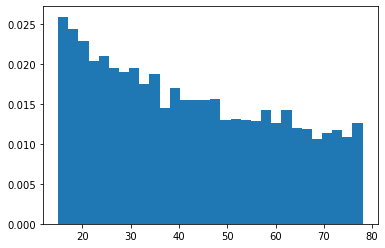

In [21]:
# x^2 + 1 integral from 2 to 5
import scipy.stats as spst
import matplotlib.pyplot as plt
N = 10000
x = np.random.rand(size)
hx = 2 + 3*x
fy = hx**2 + 1
gx = fy * 3
result = gx.mean()
S = np.std(gx,ddof = 1)
alpha = 0.05
z = spst.norm.ppf(1-alpha/2)
t = spst.t.ppf(1-alpha/2,size - 1)

upperbound = result + S*t/N**0.5
lowerbound = result - S*t/N**0.5
print(lowerbound,upperbound)

plt.hist(gx,density = True,bins = 30)
plt.show()




# High Dimensional MonteCarlos

In [56]:
#exp(-(x+y))dydx x from 0 to infinity y from 0 to x
N = 10000
x = np.random.rand(N)
y = np.random.rand(N)
hx = 1/(1-x) - 1 
hy = 1/(1-y) - 1
fy = np.exp(-hx - hy)
gx = fy * 1/(1-x)**2 * 1/(1 - y)**2
gx[hy>hx] = 0
result = gx.mean()
alpha = 0.05
S = np.std(gx,ddof = 1)
z = spst.norm.ppf(1-alpha/2)
lowerbound = result - S * z / N ** 0.5
upperbound = result + S * z/ N ** 0.5
print(lowerbound,result,upperbound)

0.4931383685994936 0.5073975138815368 0.52165665916358


In [57]:
N = 10000
alpha = 0.05
x = np.random.rand(N)
y = np.random.rand(N)
hx = 2 * x
hy = 6 * y
fy = np.exp(-hx-hy)
gx = fy * 2 * 6
gx[(hy <= 2*hx) | (hy >= 2*hx + 2)] = 0
result = gx.mean()
S = np.std(gx,ddof = 1)
z = spst.norm.ppf(1-alpha/2)
lowerbound = result - S * z / N ** 0.5
upperbound = result + S * z / N ** 0.5
print(result,lowerbound,upperbound)
#Very important, hx and hy inherits all the necessary work

0.2899037089718339 0.27106777091674933 0.3087396470269184
